In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

xls = pd.ExcelFile("../Data/Data_Tables_LGA_Criminal_Incidents_Year_Ending_September_2021.xlsx")
df = pd.read_excel (xls,'Table 01')

In [2]:
df.head()

,Year,Year ending,Police Region,Local Government Area,Incidents Recorded,"Rate per 100,000 population"
0,2021,September,1 North West Metro,Banyule,5666,4310.779038
1,2021,September,1 North West Metro,Brimbank,13161,6488.330843
2,2021,September,1 North West Metro,Darebin,10191,6180.887689
3,2021,September,1 North West Metro,Hobsons Bay,4473,4594.609322
4,2021,September,1 North West Metro,Hume,13396,5455.211528


## ANALYSIS OF "INCIDENTS RECORDED" OVER 10 YEARS FOR EACH POLICE REGION

In [4]:
c = df.loc[df['Local Government Area']=='Total',['Year','Police Region','Incidents Recorded']]
c

,Year,Police Region,Incidents Recorded
14,2021,1 North West Metro,136145
40,2021,2 Eastern,81340
51,2021,3 Southern Metro,80847
82,2021,4 Western,58217
84,2021,Justice Institutions and Immigration Facilities,1093
86,2021,Unincorporated Vic,65
101,2020,1 North West Metro,158686
127,2020,2 Eastern,91063
138,2020,3 Southern Metro,98068
169,2020,4 Western,62947


In [5]:
cdf = c.groupby('Year')['Incidents Recorded'].agg(['sum','mean','median',np.var,np.std])
cdf.head(10)

,sum,mean,median,var,std
Year,,,,,
2012,331830,55305.000000,60547.5,2.590126e+09,50893.276031
2013,336015,56002.500000,62189.0,2.530241e+09,50301.498565
2014,345776,57629.333333,64486.0,2.742332e+09,52367.282281
2015,359331,59888.500000,66401.5,2.931297e+09,54141.457759
2016,410419,68403.166667,76448.5,3.752311e+09,61256.107596
2017,389897,64982.833333,75146.0,3.230197e+09,56834.822577
2018,382777,63796.166667,71496.5,3.271865e+09,57200.221546
2019,396299,66049.833333,76125.5,3.358553e+09,57953.021597
2020,412152,68692.000000,77005.0,3.748719e+09,61226.784985


In [6]:
Total = c.groupby(['Year'])['Incidents Recorded'].agg('sum')
Total.describe()

count        10.000000
mean     372220.300000
std       29954.865667
min      331830.000000
25%      348758.750000
50%      371054.000000
75%      394698.500000
max      412152.000000
Name: Incidents Recorded, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

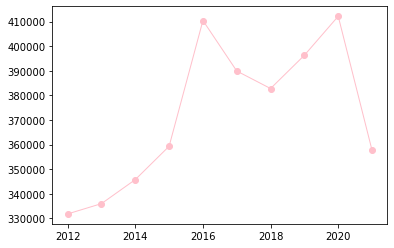

In [7]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="pink", linewidth=1, label="Total")
plt.show

In [8]:
NorthWestMetro = c[c['Police Region']=='1 North West Metro']
del NorthWestMetro['Police Region']
NorthWestMetro = NorthWestMetro.groupby(['Year'])['Incidents Recorded'].agg('sum')
NorthWestMetro

Year
2012    134869
2013    131611
2014    137684
2015    141935
2016    160143
2017    147426
2018    150357
2019    150072
2020    158686
2021    136145
Name: Incidents Recorded, dtype: int64

In [9]:
Eastern = c[c['Police Region']=='2 Eastern']
del Eastern['Police Region']
Eastern= Eastern.groupby(['Year'])['Incidents Recorded'].agg('sum')
Eastern

Year
2012    69529
2013    71682
2014    75408
2015    76300
2016    86938
2017    86012
2018    82213
2019    88545
2020    91063
2021    81340
Name: Incidents Recorded, dtype: int64

In [10]:
SouthernMetro = c[c['Police Region']=='3 Southern Metro']
del SouthernMetro['Police Region']
SouthernMetro = SouthernMetro.groupby(['Year'])['Incidents Recorded'].agg('sum')
SouthernMetro

Year
2012    74959
2013    78938
2014    78266
2015    83761
2016    96333
2017    90671
2018    87843
2019    92444
2020    98068
2021    80847
Name: Incidents Recorded, dtype: int64

In [11]:
Western = c[c['Police Region']=='4 Western']
del Western['Police Region']
Western = Western.groupby(['Year'])['Incidents Recorded'].agg('sum')
Western

Year
2012    51566
2013    52696
2014    53564
2015    56503
2016    65959
2017    64280
2018    60780
2019    63706
2020    62947
2021    58217
Name: Incidents Recorded, dtype: int64

In [12]:
Justice = c[c['Police Region']=='Justice Institutions and Immigration Facilities']
del Justice['Police Region']
Justice = Justice.groupby(['Year'])['Incidents Recorded'].agg('sum')
Justice

Year
2012     801
2013    1019
2014     757
2015     738
2016     931
2017    1395
2018    1489
2019    1438
2020    1328
2021    1093
Name: Incidents Recorded, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

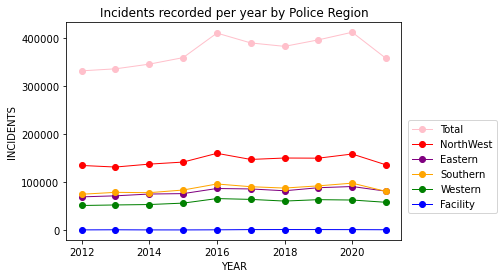

<Figure size 57600x43200 with 0 Axes>

In [13]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="pink", linewidth=1, label="Total")
plt.plot(x,NorthWestMetro, marker="o", color="red", linewidth=1, label="NorthWest")
plt.plot(x,Eastern, marker="o", color="purple", linewidth=1, label="Eastern")
plt.plot(x,SouthernMetro, marker="o", color="orange", linewidth=1, label="Southern")
plt.plot(x,Western, marker="o", color="green", linewidth=1, label="Western")
plt.plot(x,Justice, marker="o", color="blue", linewidth=1, label="Facility")
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.1))
plt.title("Incidents recorded per year by Police Region")
plt.xlabel("YEAR")
plt.ylabel("INCIDENTS")
plt.figure(figsize=(800,600))
plt.show